In [616]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp

from sklearn import linear_model
from sklearn import metrics
from sklearn.grid_search import GridSearchCV

import seaborn as sns
import missingno as msno

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, accuracy_score, mean_squared_error
import pprint
from sklearn.metrics import precision_recall_fscore_support

In [617]:
fulldf= pd.read_csv("C:/Users/Izzy/Desktop/213R/project1.csv")
df= pd.read_csv("C:/Users/Izzy/Desktop/213R/project1.csv")

In [618]:
type(df['Pop2013'])

pandas.core.series.Series

In [619]:
df=df.replace(',', '' , regex=True)

In [620]:
df=df.replace('%', '' , regex=True)

In [621]:
df['GDP_PPP_percapita']=df['GDP_PPP_percapita'].str.replace('$', '')

In [622]:
df.head()

,cont,name,Pop2013,Area_sqkm,coastline_km,PopGrowthRate,BirthRate,DeathRate,NetMigrationRate,MaternalMortalityRate,IMR,LifeExpectancy,TotalFertilityRate,AdultObesityRate,HealthExpend,ChildUnderwt,ChildUnderwtYr,GDP PPP,GDP_PPP_percapita,Percent Urban
0,Asia,Afghanistan,31108077,652230,0,2.25,39.05,14.35,-2.16,460.0,119.41,50.11,5.54,2.2,7.6,32.9,2004.0,34290000000,1100,23.50
1,Europe,Albania,3011405,28748,362,0.29,12.57,6.36,-3.32,27.0,13.65,77.77,1.49,21.3,6.6,6.3,2009.0,26540000000,8200,52
2,Africa,Algeria,38087812,2381741,998,1.90,24.25,4.31,-0.93,97.0,22.57,76.18,2.78,16.0,4.2,3.7,2005.0,277400000000,7600,73
3,Oceania,American Samoa,54719,199,116,-0.40,22.84,4.62,-22.17,NaN,9.15,74.68,3.04,74.6,NaN,NaN,NaN,575300000,8000,93
4,Europe,Andorra,85293,468,0,0.22,8.88,6.67,0.00,NaN,3.73,82.58,1.37,25.2,7.5,NaN,NaN,3163000000,37200,88


In [623]:
df.loc[:, 'Pop2013':'Percent Urban']= df.loc[:, 'Pop2013':'Percent Urban'].astype(float)

In [624]:
df['PopDens']= df['Pop2013']/df['Area_sqkm']

In [625]:
df['Coast_Area_Ratio'] = df['coastline_km'] / df['Area_sqkm']

In [626]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 22 columns):
cont                     223 non-null object
name                     223 non-null object
Pop2013                  223 non-null float64
Area_sqkm                223 non-null float64
coastline_km             223 non-null float64
PopGrowthRate            223 non-null float64
BirthRate                223 non-null float64
DeathRate                223 non-null float64
NetMigrationRate         220 non-null float64
MaternalMortalityRate    183 non-null float64
IMR                      222 non-null float64
LifeExpectancy           222 non-null float64
TotalFertilityRate       222 non-null float64
AdultObesityRate         190 non-null float64
HealthExpend             190 non-null float64
ChildUnderwt             132 non-null float64
ChildUnderwtYr           132 non-null float64
GDP PPP                  222 non-null float64
GDP_PPP_percapita        223 non-null float64
Percent Urban          

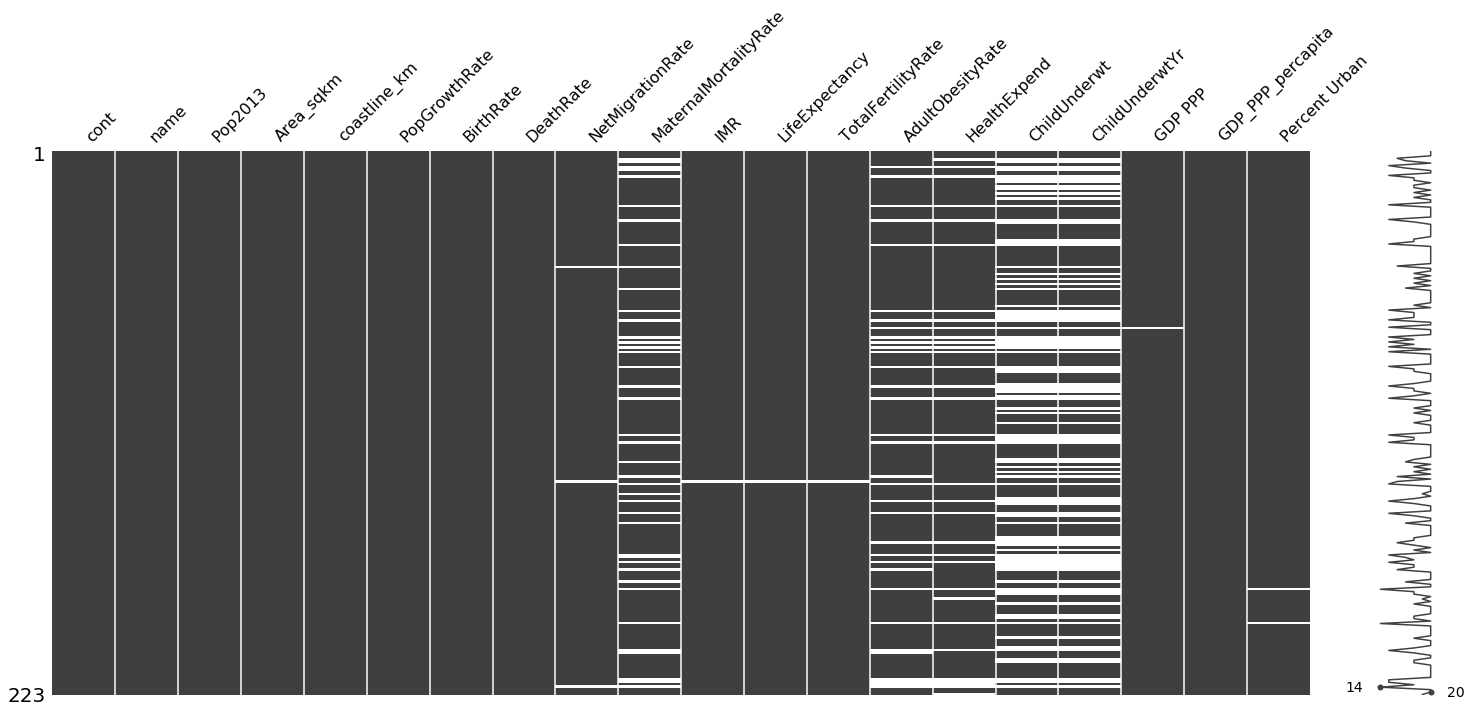

In [627]:
msno.matrix(fulldf)

In [628]:
df.isnull().sum()

cont                      0
name                      0
Pop2013                   0
Area_sqkm                 0
coastline_km              0
PopGrowthRate             0
BirthRate                 0
DeathRate                 0
NetMigrationRate          3
MaternalMortalityRate    40
IMR                       1
LifeExpectancy            1
TotalFertilityRate        1
AdultObesityRate         33
HealthExpend             33
ChildUnderwt             91
ChildUnderwtYr           91
GDP PPP                   1
GDP_PPP_percapita         0
Percent Urban             2
PopDens                   0
Coast_Area_Ratio          0
dtype: int64

In [629]:
def mynafill(var):
    df[var].fillna((df[var].median()), inplace=True)
    
    
    
    
    #df[var] = df[var].groupby(df['cont']).fillna(df[var].groupby(df['cont']).mean())

In [630]:
mynafill("MaternalMortalityRate")
mynafill("NetMigrationRate")
mynafill("IMR")
mynafill("LifeExpectancy")
mynafill("TotalFertilityRate")
mynafill("AdultObesityRate")
mynafill("HealthExpend")
mynafill("GDP PPP")
mynafill("Percent Urban")

In [631]:
hi=df['PopDens'].groupby(df['cont']).mean()
print(hi)

cont
Africa            87.703880
Asia             985.515851
Europe           575.802237
North America    231.053726
Oceania          134.306453
South America     38.557558
Name: PopDens, dtype: float64


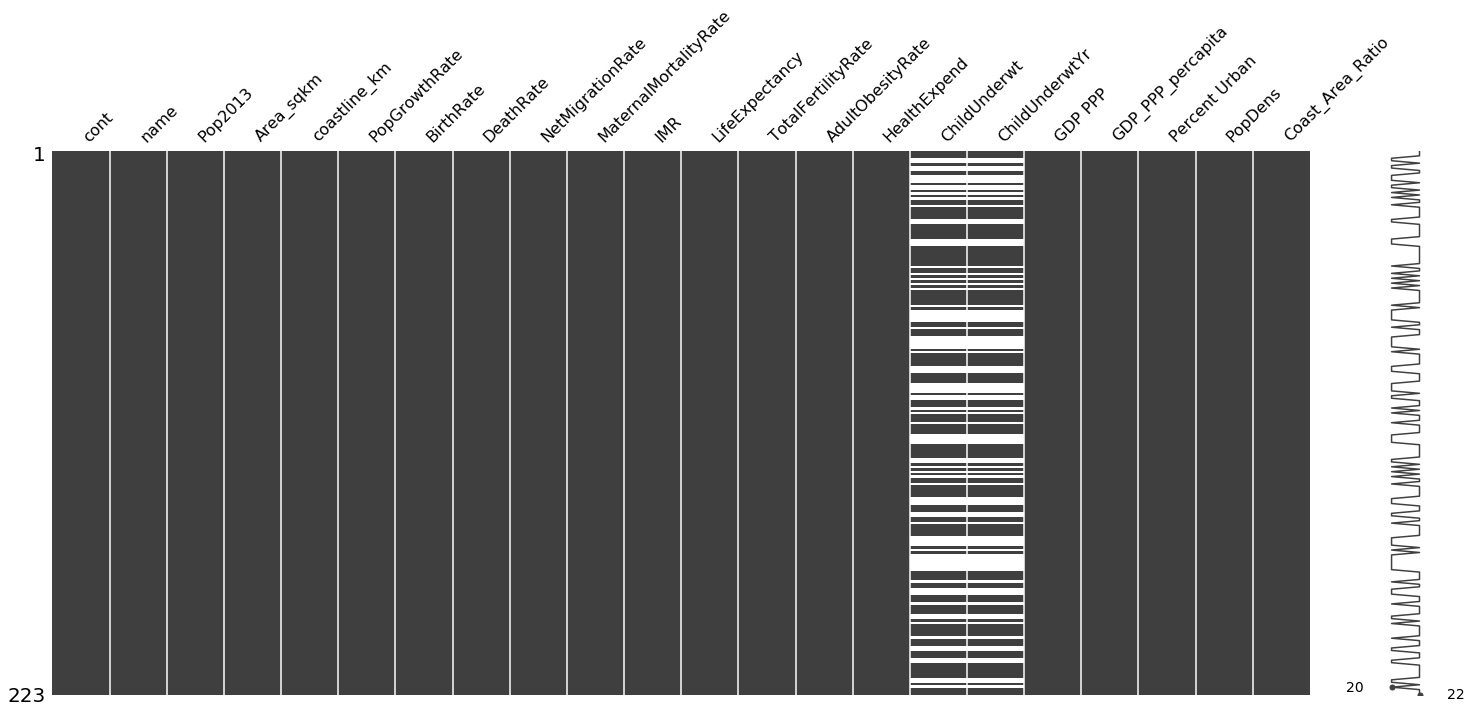

In [632]:
msno.matrix(df)

df['Percent Urban'] = df['Percent Urban'] / 100
df['BirthRate'] = df['BirthRate'] / 1000
df['DeathRate'] = df['DeathRate'] / 1000
df['PopGrowthRate'] = df['PopGrowthRate'] / 100
df['IMR'] = df['IMR'] / 1000
df['NetMigrationRate'] = df['NetMigrationRate'] / 1000
df['MaternalMortalityRate'] = df['MaternalMortalityRate'] / 100000
df['AdultObesityRate'] = df['AdultObesityRate'] / 100
df['HealthExpend'] = df['HealthExpend'] / 100

In [633]:
df.drop(columns = 'ChildUnderwt', inplace=True)
df.drop(columns = 'ChildUnderwtYr', inplace=True)
Y=df['cont']
name=df['name']
X=df
X.drop(columns = 'cont', inplace=True)
X.drop(columns = 'name', inplace=True)

In [634]:
print(np.unique(Y))

['Africa' 'Asia' 'Europe' 'North America' 'Oceania' 'South America']


In [635]:
X.tail()

,Pop2013,Area_sqkm,coastline_km,PopGrowthRate,BirthRate,DeathRate,NetMigrationRate,MaternalMortalityRate,IMR,LifeExpectancy,TotalFertilityRate,AdultObesityRate,HealthExpend,GDP PPP,GDP_PPP_percapita,Percent Urban,PopDens,Coast_Area_Ratio
218,2676740.0,5860.0,0.0,2.03,23.81,3.53,0.00,64.0,13.98,75.46,2.91,19.95,6.6,8.022000e+09,2900.0,74.3,456.781570,0.000000
219,538811.0,266000.0,1110.0,2.96,31.18,8.64,-0.06,66.0,57.50,61.90,4.15,19.95,6.6,9.065000e+08,2500.0,82.0,2.025605,0.004173
220,25408288.0,527968.0,1906.0,2.50,31.63,6.64,0.00,200.0,51.93,64.47,4.27,14.50,5.2,6.006000e+10,2300.0,32.3,48.124674,0.003610
221,14222233.0,752618.0,0.0,2.89,42.79,13.17,-0.75,440.0,68.58,51.51,5.81,3.60,5.9,2.436000e+10,1700.0,39.2,18.897014,0.000000
222,13182908.0,390757.0,0.0,4.38,32.41,11.40,22.76,570.0,27.25,53.86,3.58,7.00,6.6,7.366000e+09,600.0,38.6,33.736844,0.000000


In [636]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC

In [637]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=18)
clf = KNeighborsClassifier()
gridsearch = GridSearchCV(clf, {"n_neighbors": [1, 3, 5, 7,], "weights": ['uniform', 'distance'], 
                                'p': [1, 2, 3]})
gridsearch.fit(X_train, y_train)
print("Best Params: {}".format(gridsearch.best_params_, average=None))
y_pred_train = gridsearch.predict(X_train)
print("Train F1: {}".format(f1_score(y_train, y_pred_train, average=None)))
print("Test Classification Report:")
y_pred_test = gridsearch.predict(X_test)
print(classification_report(y_test, y_pred_test))
print("Train Accuracy: {}\tTest accuracy: {}".format(accuracy_score(y_train, y_pred_train),
                                                     accuracy_score(y_test, y_pred_test)))

Best Params: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Train F1: [0.59701493 0.49382716 0.52631579 0.33333333 0.54545455 0.        ]
Test Classification Report:
               precision    recall  f1-score   support

       Africa       0.38      0.62      0.48         8
         Asia       0.75      0.33      0.46         9
       Europe       0.36      0.50      0.42         8
North America       0.50      0.17      0.25         6
      Oceania       0.25      0.50      0.33         2
South America       0.00      0.00      0.00         1

  avg / total       0.48      0.41      0.40        34

Train Accuracy: 0.5079365079365079	Test accuracy: 0.4117647058823529


C:\Users\Izzy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Izzy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [638]:
def quantiles(var):
    X[var+'q'] = pd.qcut(X[var] ,4, labels=[1,2,3,4]).astype(float)

In [639]:
quantiles('IMR')
quantiles('HealthExpend')
quantiles('LifeExpectancy')
quantiles('GDP_PPP_percapita')

In [640]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 22 columns):
Pop2013                  223 non-null float64
Area_sqkm                223 non-null float64
coastline_km             223 non-null float64
PopGrowthRate            223 non-null float64
BirthRate                223 non-null float64
DeathRate                223 non-null float64
NetMigrationRate         223 non-null float64
MaternalMortalityRate    223 non-null float64
IMR                      223 non-null float64
LifeExpectancy           223 non-null float64
TotalFertilityRate       223 non-null float64
AdultObesityRate         223 non-null float64
HealthExpend             223 non-null float64
GDP PPP                  223 non-null float64
GDP_PPP_percapita        223 non-null float64
Percent Urban            223 non-null float64
PopDens                  223 non-null float64
Coast_Area_Ratio         223 non-null float64
IMRq                     223 non-null float64
HealthExpendq        

In [641]:
Xcat=X.copy()

In [642]:
X['IMRq']*=-1
X['advantage_score'] = X.loc[:, 'IMRq':'GDP_PPP_percapitaq'].sum(axis=1)

In [643]:
X.head()

,Pop2013,Area_sqkm,coastline_km,PopGrowthRate,BirthRate,DeathRate,NetMigrationRate,MaternalMortalityRate,IMR,LifeExpectancy,...,GDP PPP,GDP_PPP_percapita,Percent Urban,PopDens,Coast_Area_Ratio,IMRq,HealthExpendq,LifeExpectancyq,GDP_PPP_percapitaq,advantage_score
0,31108077.0,652230.0,0.0,2.25,39.05,14.35,-2.16,460.0,119.41,50.11,...,3.429000e+10,1100.0,23.5,47.694950,0.000000,-4.0,3.0,1.0,1.0,1.0
1,3011405.0,28748.0,362.0,0.29,12.57,6.36,-3.32,27.0,13.65,77.77,...,2.654000e+10,8200.0,52.0,104.751809,0.012592,-2.0,2.0,3.0,2.0,5.0
2,38087812.0,2381741.0,998.0,1.90,24.25,4.31,-0.93,97.0,22.57,76.18,...,2.774000e+11,7600.0,73.0,15.991584,0.000419,-3.0,1.0,3.0,2.0,3.0
3,54719.0,199.0,116.0,-0.40,22.84,4.62,-22.17,66.0,9.15,74.68,...,5.753000e+08,8000.0,93.0,274.969849,0.582915,-2.0,2.0,3.0,2.0,5.0
4,85293.0,468.0,0.0,0.22,8.88,6.67,0.00,66.0,3.73,82.58,...,3.163000e+09,37200.0,88.0,182.250000,0.000000,-1.0,3.0,4.0,4.0,10.0


In [644]:
print(X['advantage_score'])

0       1.0
1       5.0
2       3.0
3       5.0
4      10.0
5       0.0
6       8.0
7       6.0
8       7.0
9       2.0
10      6.0
11     11.0
12     11.0
13      4.0
14      7.0
15      7.0
16      0.0
17      7.0
18      6.0
19     11.0
20      3.0
21     -1.0
22      9.0
23      2.0
24      2.0
25      8.0
26      6.0
27      6.0
28      8.0
29      6.0
       ... 
193     9.0
194     2.0
195     0.0
196     2.0
197     4.0
198     1.0
199     4.0
200     4.0
201     4.0
202     5.0
203     2.0
204     8.0
205     3.0
206     2.0
207     5.0
208     6.0
209    11.0
210    11.0
211     8.0
212     3.0
213     3.0
214     3.0
215     4.0
216     7.0
217     7.0
218     4.0
219     0.0
220     0.0
221     0.0
222     1.0
Name: advantage_score, Length: 223, dtype: float64


In [645]:
X.drop(columns = 'IMR', inplace=True)
X.drop(columns = 'HealthExpend', inplace=True)
X.drop(columns = 'LifeExpectancy', inplace=True)
X.drop(columns = 'GDP_PPP_percapita', inplace=True)

In [646]:
X.drop(columns = 'IMRq', inplace=True)
X.drop(columns = 'HealthExpendq', inplace=True)
X.drop(columns = 'LifeExpectancyq', inplace=True)
X.drop(columns = 'GDP_PPP_percapitaq', inplace=True)

In [647]:
X.head()

,Pop2013,Area_sqkm,coastline_km,PopGrowthRate,BirthRate,DeathRate,NetMigrationRate,MaternalMortalityRate,TotalFertilityRate,AdultObesityRate,GDP PPP,Percent Urban,PopDens,Coast_Area_Ratio,advantage_score
0,31108077.0,652230.0,0.0,2.25,39.05,14.35,-2.16,460.0,5.54,2.2,3.429000e+10,23.5,47.694950,0.000000,1.0
1,3011405.0,28748.0,362.0,0.29,12.57,6.36,-3.32,27.0,1.49,21.3,2.654000e+10,52.0,104.751809,0.012592,5.0
2,38087812.0,2381741.0,998.0,1.90,24.25,4.31,-0.93,97.0,2.78,16.0,2.774000e+11,73.0,15.991584,0.000419,3.0
3,54719.0,199.0,116.0,-0.40,22.84,4.62,-22.17,66.0,3.04,74.6,5.753000e+08,93.0,274.969849,0.582915,5.0
4,85293.0,468.0,0.0,0.22,8.88,6.67,0.00,66.0,1.37,25.2,3.163000e+09,88.0,182.250000,0.000000,10.0


In [648]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=18)
clf = KNeighborsClassifier()
gridsearch = GridSearchCV(clf, {"n_neighbors": [1, 3, 5, 7,], "weights": ['uniform', 'distance'], 
                                'p': [1, 2, 3]})
gridsearch.fit(X_train, y_train)
print("Best Params: {}".format(gridsearch.best_params_, average=None))
y_pred_train = gridsearch.predict(X_train)
print("Train F1: {}".format(f1_score(y_train, y_pred_train, average=None)))
print("Test Classification Report:")
y_pred_test = gridsearch.predict(X_test)
print(classification_report(y_test, y_pred_test))
print("Train Accuracy: {}\tTest accuracy: {}".format(accuracy_score(y_train, y_pred_train),
                                                     accuracy_score(y_test, y_pred_test)))

Best Params: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Train F1: [0.59701493 0.49382716 0.52631579 0.33333333 0.54545455 0.        ]
Test Classification Report:
               precision    recall  f1-score   support

       Africa       0.38      0.62      0.48         8
         Asia       0.75      0.33      0.46         9
       Europe       0.36      0.50      0.42         8
North America       0.50      0.17      0.25         6
      Oceania       0.25      0.50      0.33         2
South America       0.00      0.00      0.00         1

  avg / total       0.48      0.41      0.40        34

Train Accuracy: 0.5079365079365079	Test accuracy: 0.4117647058823529


C:\Users\Izzy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Izzy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [651]:
X_train, X_test, y_train, y_test = train_test_split(Xcat, Y, test_size=0.15, random_state=18)

n_estimators = [1000, 750, 500]
max_depth = [5, 10, 15]
class_weights = ['balanced', None]
best_f1 = 0

for est in n_estimators:
    for depth in max_depth:
        for wgt in class_weights:
            print(est, depth, wgt)
            rf = RandomForestClassifier(n_estimators=est, max_depth=depth, oob_score=True, class_weight=wgt)
            rf.fit(X_train, y_train)
            f1 = f1_score(y_train, np.argmax(rf.oob_decision_function_ , 1), average='micro')
            if f1 > best_f1:
                best_f1 = f1
                best_params = (est, depth, wgt)

1000 5 balanced


ValueError: Mix of label input types (string and number)

In [ ]:
print("Best OOB F1: {}".format(best_f1))
print("Best params: {}".format(best_params))

In [ ]:
rf = RandomForestClassifier(n_estimators=500, max_depth=7, class_weight=None)
rf.fit(train, y_train)
train_predictions5 = rf.predict(train)
print(classification_report(y_train, train_predictions5))

In [ ]:
f1_score(y_train, train_predictions5, average = 'macro')

In [561]:
Xcat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 22 columns):
Pop2013                  223 non-null float64
Area_sqkm                223 non-null float64
coastline_km             223 non-null float64
PopGrowthRate            223 non-null float64
BirthRate                223 non-null float64
DeathRate                223 non-null float64
NetMigrationRate         223 non-null float64
MaternalMortalityRate    223 non-null float64
IMR                      223 non-null float64
LifeExpectancy           223 non-null float64
TotalFertilityRate       223 non-null float64
AdultObesityRate         223 non-null float64
HealthExpend             223 non-null float64
GDP PPP                  223 non-null float64
GDP_PPP_percapita        223 non-null float64
Percent Urban            223 non-null float64
PopDens                  223 non-null float64
Coast_Area_Ratio         223 non-null float64
IMRq                     223 non-null int32
HealthExpendq          

In [607]:
Y=str(Y)

In [612]:
X.shape

(223, 15)

In [650]:
X=pd.DataFrame(X)